# Business Sales EDA Project

## Objective
Analyze business sales data to identify trends, impact of promotions,
seasonal effects, and brand performance.

## Key Questions
- Does promotion increase sales?
- Which product categories perform best?
- Seasonal vs non-seasonal sales comparison


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Business_sales_EDA.csv')
df

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20247,219627,Front of Store,Yes,clothing,No,1754,Zara,https://www.zara.com/us/en/suit-jacket-in-100-...,CROPPED WASHED T-SHIRT CHARCOAL,Running shoes. Upper in a combination of piece...,31.95,USD,jeans,WOMAN,Summer,Linen Blend,India
20248,219628,Aisle,No,clothing,No,872,Zara,https://www.zara.com/us/en/fleece-overshirt-p0...,SATIN WOVEN LEATHER SLIDES STONE,Slim fit shirt. Round neck and short sleeves.,49.99,USD,jackets,WOMAN,Spring,Linen,China
20249,219629,Aisle,Yes,clothing,No,1360,Zara,https://www.zara.com/us/en/faux-suede-patch-ja...,RELAXED CROPPED LEATHER JACKET CHARCOAL,Ankle boots. Made of leather with a suede fini...,20.99,USD,shoes,WOMAN,Spring,Polyester,China
20250,219630,Aisle,No,clothing,No,892,Zara,https://www.zara.com/us/en/fine-knit-crop-swea...,SLIM BASIC 100% WOOL SWEATER BURGUNDY,RETRO SNEAKERS,64.95,USD,jackets,WOMAN,Winter,Polyester,Spain


# Exploratory Data Analysis

In [3]:
df.shape

(20252, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        20252 non-null  int64  
 1   Product Position  20252 non-null  object 
 2   Promotion         20252 non-null  object 
 3   Product Category  20252 non-null  object 
 4   Seasonal          20252 non-null  object 
 5   Sales Volume      20252 non-null  int64  
 6   brand             20252 non-null  object 
 7   url               20252 non-null  object 
 8   name              20251 non-null  object 
 9   description       20250 non-null  object 
 10  price             20252 non-null  float64
 11  currency          20252 non-null  object 
 12  terms             20252 non-null  object 
 13  section           20252 non-null  object 
 14  season            20252 non-null  object 
 15  material          20252 non-null  object 
 16  origin            20252 non-null  object

In [5]:
df.columns.tolist()

['Product ID',
 'Product Position',
 'Promotion',
 'Product Category',
 'Seasonal',
 'Sales Volume',
 'brand',
 'url',
 'name',
 'description',
 'price',
 'currency',
 'terms',
 'section',
 'season',
 'material',
 'origin']

In [6]:
df['Product ID'].nunique()

20252

In [7]:
df['Product Position'].unique()

array(['Aisle', 'End-cap', 'Front of Store'], dtype=object)

In [8]:
df['Product Position'].nunique()

3

In [9]:
df['Product Position'].value_counts()

Product Position
Aisle             7810
End-cap           6791
Front of Store    5651
Name: count, dtype: int64

In [10]:
df['Promotion'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
df['Promotion'].value_counts()

Promotion
No     11812
Yes     8440
Name: count, dtype: int64

In [12]:
df['Product Category'].unique()

array(['clothing'], dtype=object)

In [13]:
df['Seasonal'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df['Seasonal'].value_counts()

Seasonal
No     10136
Yes    10116
Name: count, dtype: int64

In [15]:
df['Sales Volume'].nunique()

1284

In [16]:
df['brand'].unique()

array(['Zara'], dtype=object)

In [17]:
df['url'].nunique()

228

In [18]:
df['name'].unique()

array(['BASIC PUFFER JACKET', 'TUXEDO JACKET', 'SLIM FIT SUIT JACKET',
       ..., 'RELAXED CROPPED LEATHER JACKET CHARCOAL',
       'SLIM BASIC 100% WOOL SWEATER BURGUNDY',
       'KNIT TUXEDO JACKET BURGUNDY'], dtype=object)

In [19]:
df['name'].nunique()

17215

In [20]:
df['description'].nunique()

221

In [21]:
df['price'].nunique()

330

In [22]:
df['currency'].unique()

array(['USD'], dtype=object)

In [23]:
df['terms'].unique()

array(['jackets', 'shoes', 'sweaters', 'jeans', 't-shirts'], dtype=object)

In [24]:
df['terms'].nunique()

5

In [25]:
df['terms'].value_counts()

terms
jackets     11232
sweaters     3257
t-shirts     2646
shoes        2458
jeans         659
Name: count, dtype: int64

In [26]:
df['section'].unique()

array(['MAN', 'WOMAN'], dtype=object)

In [27]:
df['section'].value_counts()

section
WOMAN    13254
MAN       6998
Name: count, dtype: int64

In [28]:
df['season'].unique()

array(['Winter', 'Autumn', 'Spring', 'Summer'], dtype=object)

In [29]:
df['season'].nunique()

4

In [30]:
df['season'].value_counts()

season
Autumn    7665
Winter    5144
Spring    4537
Summer    2906
Name: count, dtype: int64

In [31]:
df['material'].unique()

array(['Polyester', 'Cotton', 'Wool Blend', 'Acrylic', 'Wool', 'Viscose',
       'Linen', 'Denim', 'Linen Blend', 'Satin', 'Silk'], dtype=object)

In [32]:
df['material'].nunique()

11

In [33]:
df['material'].value_counts()

material
Cotton         3851
Wool           3805
Wool Blend     3373
Polyester      2775
Linen          2573
Denim          1027
Viscose         990
Acrylic         881
Linen Blend     807
Satin           132
Silk             38
Name: count, dtype: int64

In [34]:
df['origin'].unique()

array(['Brazil', 'Turkey', 'Morocco', 'China', 'Portugal', 'India',
       'Bangladesh', 'Vietnam', 'Spain', 'Cambodia', 'Argentina',
       'Pakistan'], dtype=object)

In [35]:
df['origin'].nunique()

12

In [36]:
df['origin'].value_counts()

origin
China         4026
Bangladesh    3617
Turkey        2475
India         2033
Morocco       1653
Portugal      1420
Spain         1248
Vietnam       1220
Cambodia       981
Brazil         795
Pakistan       605
Argentina      179
Name: count, dtype: int64

In [37]:
countinous = ['price']

count = ['Product ID','Sales Volume']

categorical = ['Product Position','Promotion','Product Category','Seasonal','brand','url','name','description','currency','terms', 'section','season','material','origin'
]


In [38]:
df[countinous].describe()

,price
count,20252.000000
mean,41.949061
std,23.380960
min,12.000000
25%,23.950000
50%,35.950000
75%,53.950000
max,134.990000


In [39]:
df[categorical].describe()

,Product Position,Promotion,Product Category,Seasonal,brand,url,name,description,currency,terms,section,season,material,origin
count,20252,20252,20252,20252,20252,20252,20251,20250,20252,20252,20252,20252,20252,20252
unique,3,2,1,2,1,228,17215,221,1,5,2,4,11,12
top,Aisle,No,clothing,No,Zara,https://www.zara.com/us/en/knit-sweater-with-r...,PLAID OVERSHIRT,Varsity jacket with elastic collar and long sl...,USD,jackets,WOMAN,Autumn,Cotton,China
freq,7810,11812,20252,10136,20252,187,8,333,20252,11232,13254,7665,3851,4026


In [40]:
df.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                1
description         2
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64

In [41]:
df[countinous].skew()

price    1.225006
dtype: float64

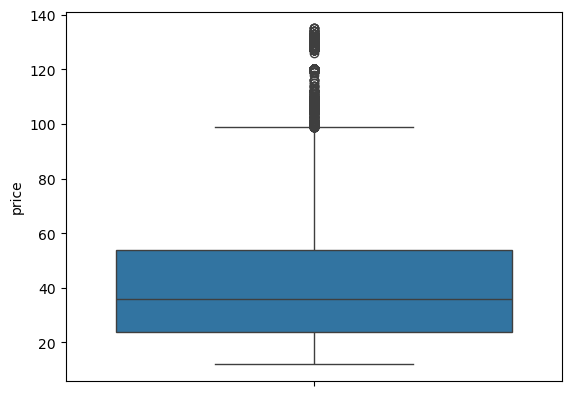

In [42]:
sns.boxplot(df['price'])
plt.show()

In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.dtypes

Product ID            int64
Product Position     object
Promotion            object
Product Category     object
Seasonal             object
Sales Volume          int64
brand                object
url                  object
name                 object
description          object
price               float64
currency             object
terms                object
section              object
season               object
material             object
origin               object
dtype: object

In [45]:
df

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20247,219627,Front of Store,Yes,clothing,No,1754,Zara,https://www.zara.com/us/en/suit-jacket-in-100-...,CROPPED WASHED T-SHIRT CHARCOAL,Running shoes. Upper in a combination of piece...,31.95,USD,jeans,WOMAN,Summer,Linen Blend,India
20248,219628,Aisle,No,clothing,No,872,Zara,https://www.zara.com/us/en/fleece-overshirt-p0...,SATIN WOVEN LEATHER SLIDES STONE,Slim fit shirt. Round neck and short sleeves.,49.99,USD,jackets,WOMAN,Spring,Linen,China
20249,219629,Aisle,Yes,clothing,No,1360,Zara,https://www.zara.com/us/en/faux-suede-patch-ja...,RELAXED CROPPED LEATHER JACKET CHARCOAL,Ankle boots. Made of leather with a suede fini...,20.99,USD,shoes,WOMAN,Spring,Polyester,China
20250,219630,Aisle,No,clothing,No,892,Zara,https://www.zara.com/us/en/fine-knit-crop-swea...,SLIM BASIC 100% WOOL SWEATER BURGUNDY,RETRO SNEAKERS,64.95,USD,jackets,WOMAN,Winter,Polyester,Spain


# Data cleaning

In [46]:
df.drop(columns=['Product ID','Product Category','brand','url','description','currency'], inplace=True)

In [47]:
df['name'] = df['name'].fillna(df['name'].mode()[0])


In [48]:
df[['Promotion','Seasonal']]=df[['Promotion','Seasonal']].replace({'Yes': True,'No': False})

In [49]:
df['section'] = df['section'].replace({
    "MAN": "Men's",
    "WOMAN": "Women's"
})


In [50]:
df.rename(columns={'terms': 'product_category', 'name': 'product_name'}, inplace=True)

In [51]:
df.dtypes

Product Position     object
Promotion              bool
Seasonal               bool
Sales Volume          int64
product_name         object
price               float64
product_category     object
section              object
season               object
material             object
origin               object
dtype: object

In [52]:
df.isnull().sum()

Product Position    0
Promotion           0
Seasonal            0
Sales Volume        0
product_name        0
price               0
product_category    0
section             0
season              0
material            0
origin              0
dtype: int64

In [53]:
df

,Product Position,Promotion,Seasonal,Sales Volume,product_name,price,product_category,section,season,material,origin
0,Aisle,True,True,1243,BASIC PUFFER JACKET,78.99,jackets,Men's,Winter,Polyester,Brazil
1,Aisle,True,False,1429,TUXEDO JACKET,14.99,jackets,Men's,Autumn,Cotton,Turkey
2,End-cap,True,True,1168,SLIM FIT SUIT JACKET,71.95,jackets,Women's,Autumn,Polyester,Morocco
3,Aisle,True,False,1348,STRETCH SUIT JACKET,30.99,jackets,Men's,Spring,Polyester,China
4,End-cap,True,True,1602,DOUBLE FACED JACKET,22.99,jackets,Women's,Winter,Wool Blend,China
...,...,...,...,...,...,...,...,...,...,...,...
20247,Front of Store,True,False,1754,CROPPED WASHED T-SHIRT CHARCOAL,31.95,jeans,Women's,Summer,Linen Blend,India
20248,Aisle,False,False,872,SATIN WOVEN LEATHER SLIDES STONE,49.99,jackets,Women's,Spring,Linen,China
20249,Aisle,True,False,1360,RELAXED CROPPED LEATHER JACKET CHARCOAL,20.99,shoes,Women's,Spring,Polyester,China
20250,Aisle,False,False,892,SLIM BASIC 100% WOOL SWEATER BURGUNDY,64.95,jackets,Women's,Winter,Polyester,Spain


# Data Analysis

**Univeriate plots**

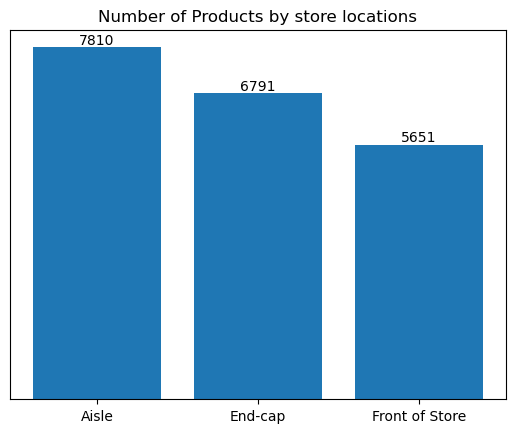

In [54]:
bars=plt.bar(df['Product Position'].value_counts().index,df['Product Position'].value_counts())
plt.ylabel('')
plt.yticks([])
plt.title('Number of Products by store locations')
plt.bar_label(bars)
plt.show()

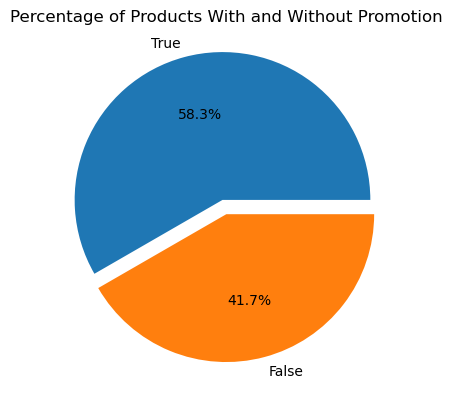

In [55]:
plt.pie(x=df['Promotion'].value_counts(), labels=df['Promotion'].unique(),autopct='%0.1f%%',explode=[0.1,0.0])
plt.title('Percentage of Products With and Without Promotion')
plt.show()

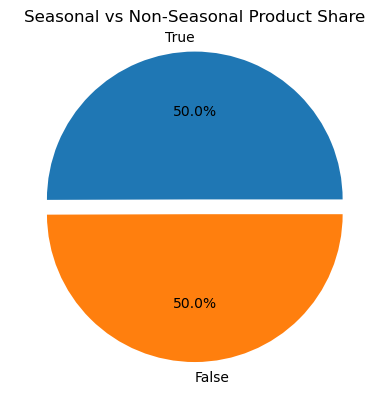

In [56]:
plt.pie(x=df['Seasonal'].value_counts(), labels=df['Seasonal'].unique(), autopct='%0.1f%%',explode=[0.1,0.0])
plt.title('Seasonal vs Non-Seasonal Product Share')
plt.show()

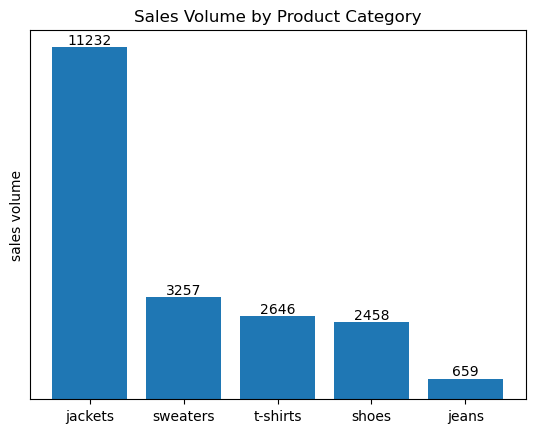

In [57]:
bars=plt.bar(df['product_category'].value_counts().index,df['product_category'].value_counts())
plt.ylabel('sales volume')
plt.yticks([])
plt.bar_label(bars)
plt.title('Sales Volume by Product Category')
plt.show()

In [58]:
df['price'].describe()

count    20252.000000
mean        41.949061
std         23.380960
min         12.000000
25%         23.950000
50%         35.950000
75%         53.950000
max        134.990000
Name: price, dtype: float64

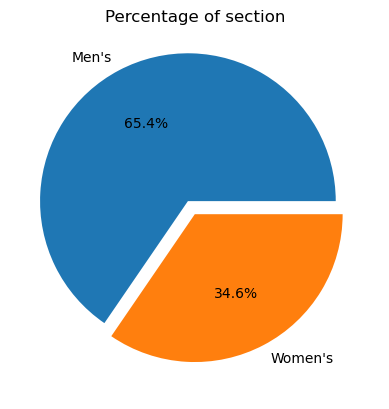

In [59]:
plt.pie(x=df['section'].value_counts(), labels=df['section'].unique(),autopct='%0.1f%%',explode=[0.1,0.0])
plt.title('Percentage of section')
plt.show()

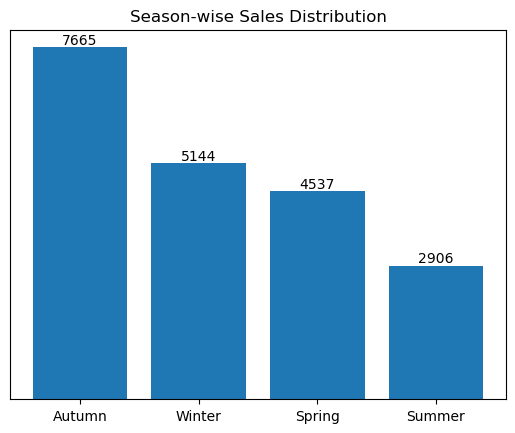

In [92]:
bars=plt.bar(df['season'].value_counts().index,df['season'].value_counts())
plt.ylabel('')
plt.yticks([])
plt.title('Season-wise Sales Distribution')
plt.bar_label(bars)
plt.savefig("season_sales.png", dpi=300, bbox_inches="tight")
plt.show()

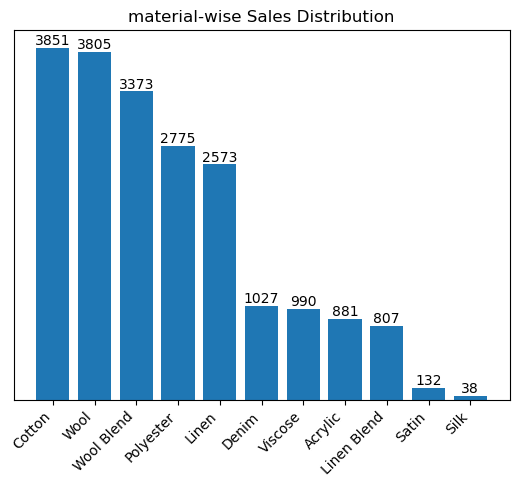

In [93]:
bars=plt.bar(df['material'].value_counts().index,df['material'].value_counts())
plt.ylabel('')
plt.yticks([])
plt.title('material-wise Sales Distribution')
plt.bar_label(bars)
plt.xticks(rotation=45, ha='right')
plt.savefig("season_sales.png", dpi=300, bbox_inches="tight")
plt.show()

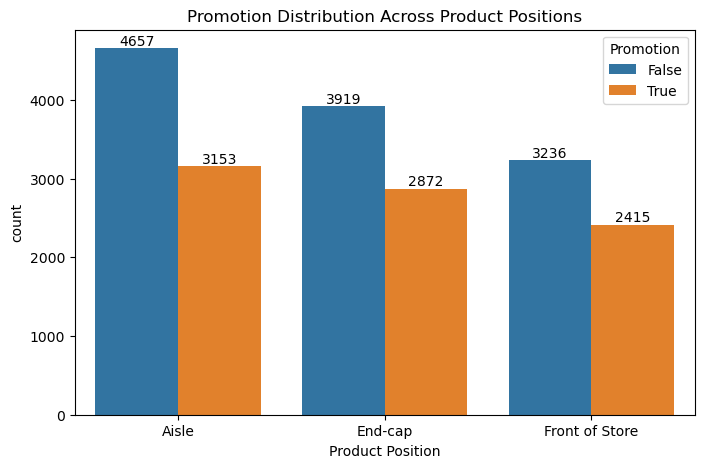

In [62]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x="Product Position",data=df, hue = "Promotion")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Promotion Distribution Across Product Positions')
plt.show()

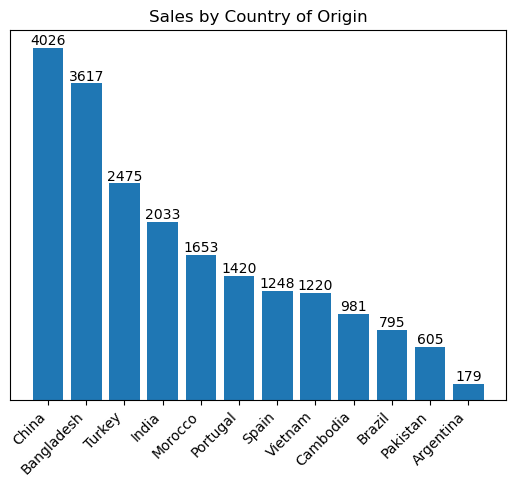

In [63]:
bars=plt.bar(df['origin'].value_counts().index,df['origin'].value_counts())
plt.ylabel('')
plt.yticks([])
plt.title('Sales by Country of Origin')
plt.bar_label(bars)
plt.xticks(rotation=45, ha='right')
plt.show()

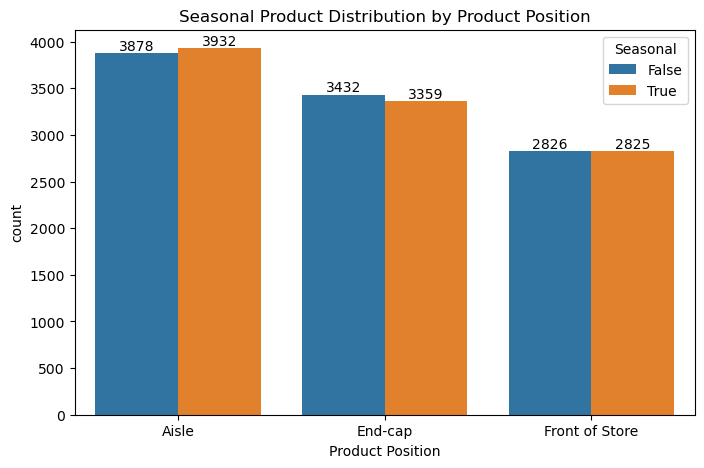

In [64]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x="Product Position",data=df, hue = "Seasonal")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Seasonal Product Distribution by Product Position')
plt.show()

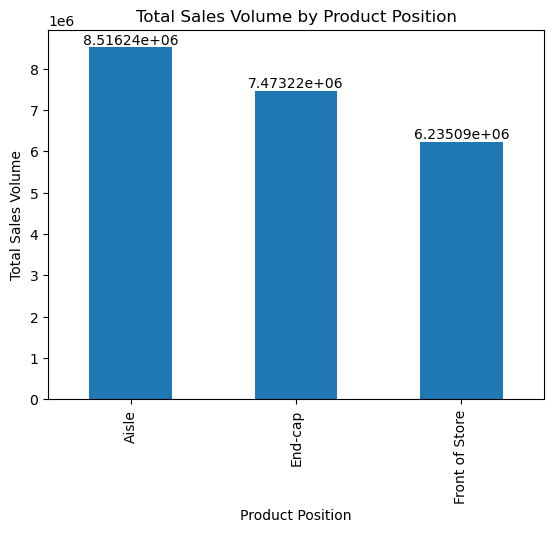

In [65]:
ax=df.groupby("Product Position")["Sales Volume"].sum().plot(kind="bar")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Total Sales Volume by Product Position")
plt.xlabel("Product Position")
plt.ylabel("Total Sales Volume")
plt.show()

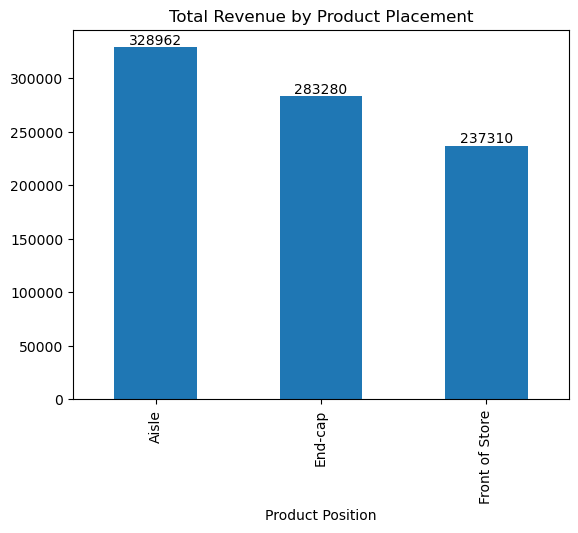

In [66]:
ax=df.groupby("Product Position")["price"].sum().plot(kind="bar")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Total Revenue by Product Placement")
plt.xlabel("Product Position")
plt.show()

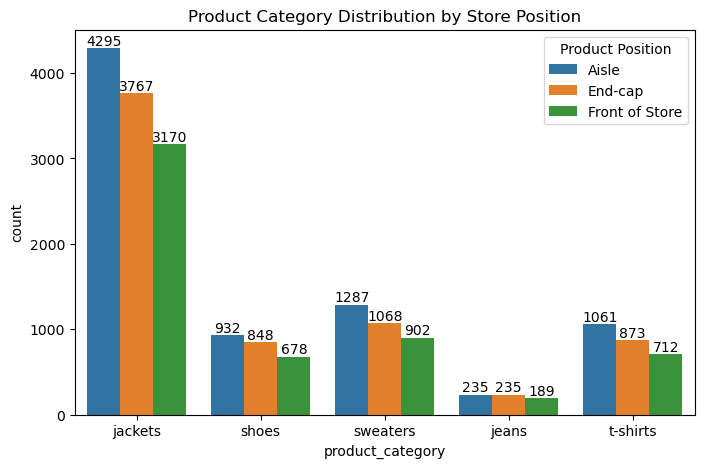

In [67]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x="product_category",data=df, hue = "Product Position")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Product Category Distribution by Store Position")
plt.show()

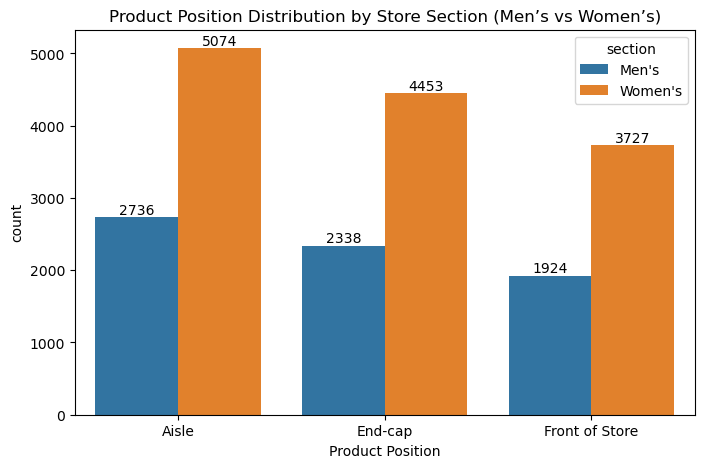

In [68]:
bars=plt.figure(figsize=(8,5))
ax=sns.countplot(x="Product Position",data=df, hue = "section")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Product Position Distribution by Store Section (Men’s vs Women’s)')
plt.show()

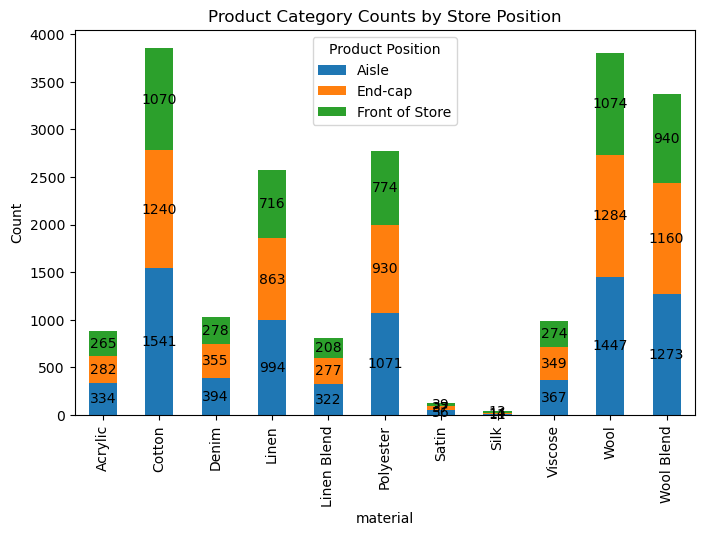

In [69]:
stacked_data = pd.crosstab(df['material'], df['Product Position'])
ax=stacked_data.plot(kind='bar', stacked=True, figsize=(8,5))
plt.xlabel("material")
plt.ylabel("Count")
plt.legend(title="Product Position")
plt.tight_layout
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.title('Product Category Counts by Store Position')
plt.show()

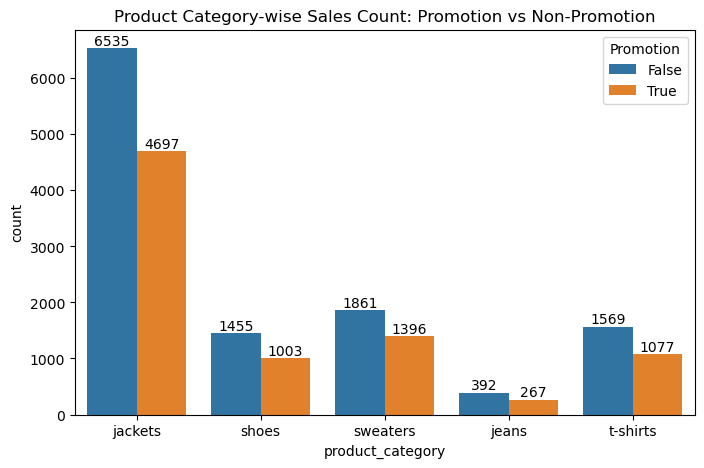

In [70]:
bars=plt.figure(figsize=(8,5))
ax=sns.countplot(x="product_category",data=df, hue = "Promotion")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Product Category-wise Sales Count: Promotion vs Non-Promotion')
plt.show()

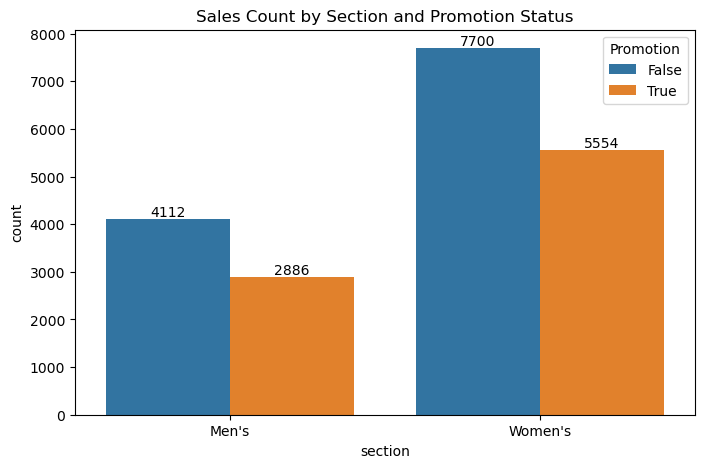

In [71]:
bars=plt.figure(figsize=(8,5))
ax=sns.countplot(x="section",data=df, hue = "Promotion")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Sales Count by Section and Promotion Status')
plt.show()

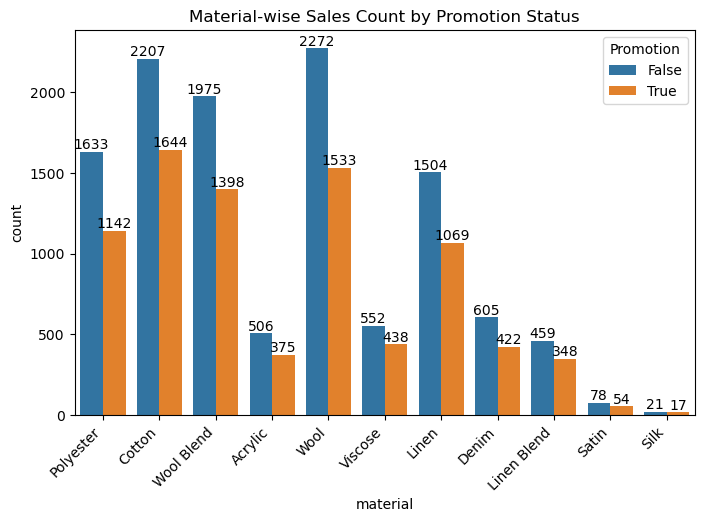

In [72]:
bars=plt.figure(figsize=(8,5))
ax=sns.countplot(x="material",data=df, hue = "Promotion")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45, ha='right')
plt.title('Material-wise Sales Count by Promotion Status')
plt.show()

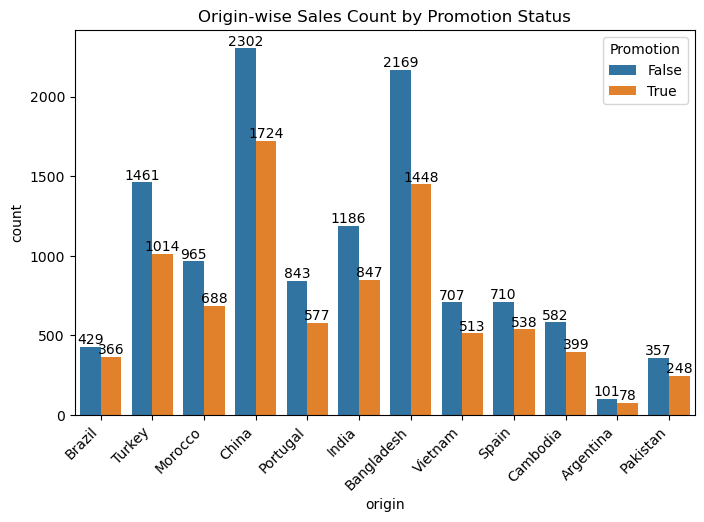

In [73]:
bars=plt.figure(figsize=(8,5))
ax=sns.countplot(x="origin",data=df, hue = "Promotion")
for container in ax.containers:
    ax.bar_label(container)
    plt.xticks(rotation=45, ha='right')
plt.title('Origin-wise Sales Count by Promotion Status')
plt.show()

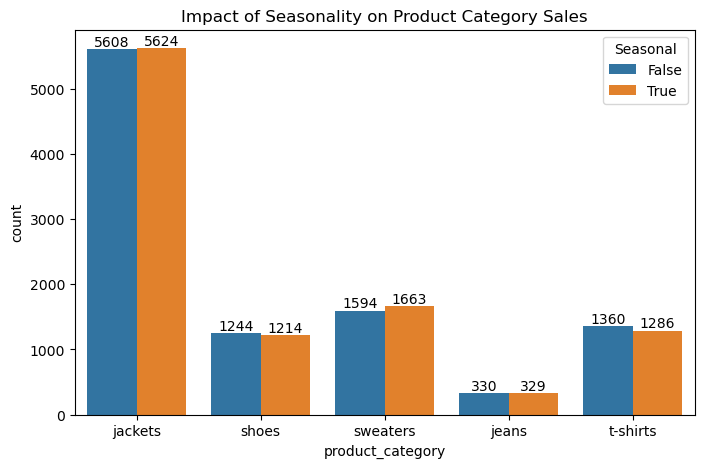

In [74]:
bars=plt.figure(figsize=(8,5))
ax=sns.countplot(x="product_category",data=df, hue = "Seasonal")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Impact of Seasonality on Product Category Sales")
plt.show()

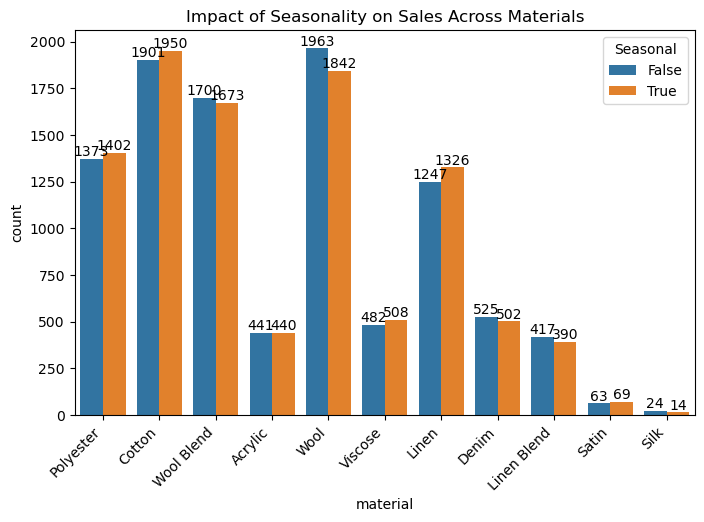

In [75]:
bars=plt.figure(figsize=(8,5))
ax=sns.countplot(x="material",data=df, hue = "Seasonal")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45, ha='right')
plt.title('Impact of Seasonality on Sales Across Materials')
plt.show()

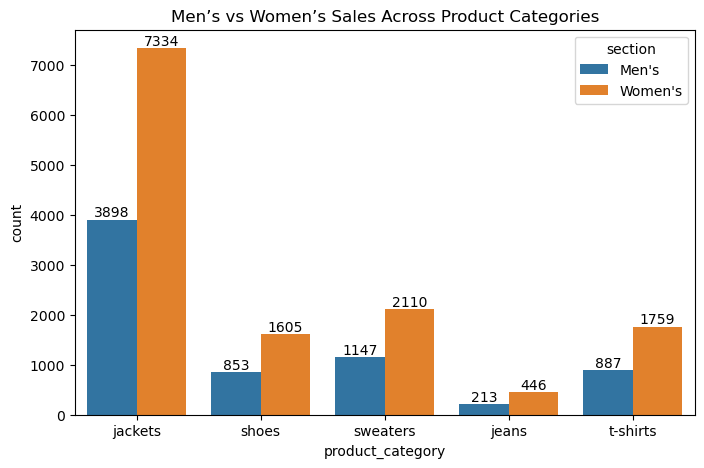

In [94]:
bars=plt.figure(figsize=(8,5))
ax=sns.countplot(x="product_category",data=df, hue = "section")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Men’s vs Women’s Sales Across Product Categories')
plt.savefig("season_sales.png", dpi=300, bbox_inches="tight")
plt.show()

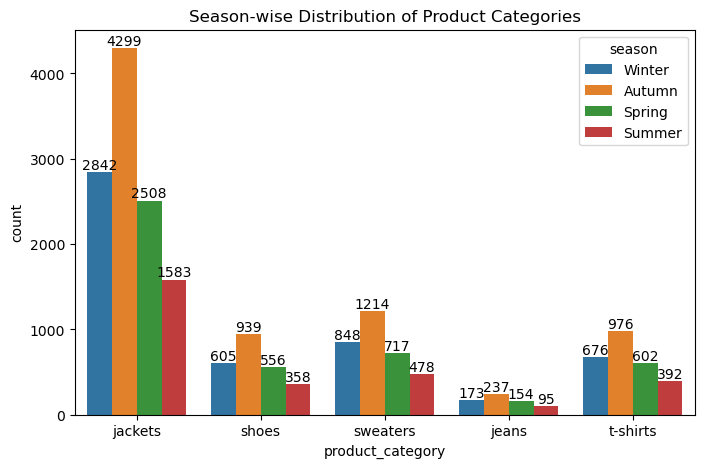

In [77]:
bars=plt.figure(figsize=(8,5))
ax=sns.countplot(x="product_category",data=df, hue ='season')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Season-wise Distribution of Product Categories')
plt.show()

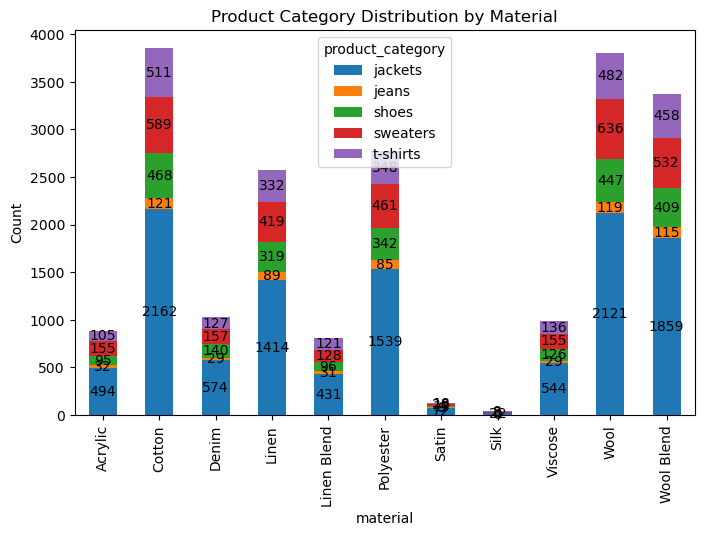

In [78]:
stacked_data = pd.crosstab(df['material'], df['product_category'])
ax=stacked_data.plot(kind='bar', stacked=True, figsize=(8,5))
plt.xlabel("material")
plt.ylabel("Count")
plt.legend(title="product_category")
plt.tight_layout
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.title('Product Category Distribution by Material')
plt.show()

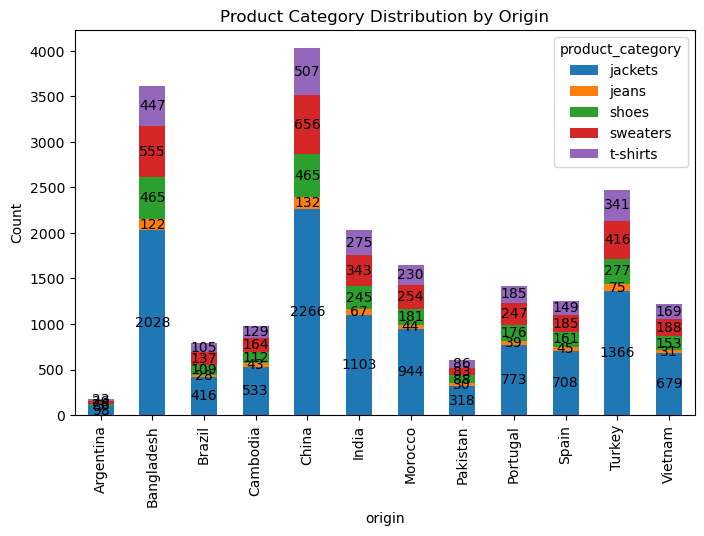

In [79]:
stacked_data = pd.crosstab(df['origin'], df['product_category'])
ax=stacked_data.plot(kind='bar', stacked=True, figsize=(8,5))
plt.xlabel("origin")
plt.ylabel("Count")
plt.legend(title="product_category")
plt.tight_layout
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.title('Product Category Distribution by Origin')
plt.show()

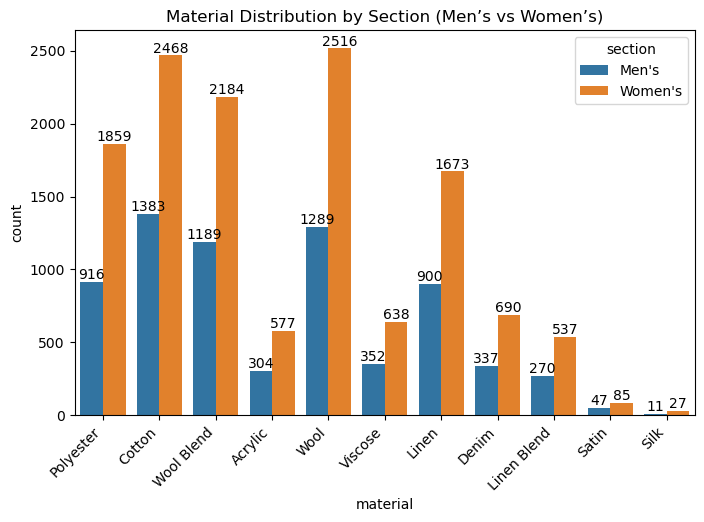

In [80]:
bars=plt.figure(figsize=(8,5))
ax=sns.countplot(x="material",data=df, hue ='section')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45, ha='right')
plt.title('Material Distribution by Section (Men’s vs Women’s)')
plt.show()

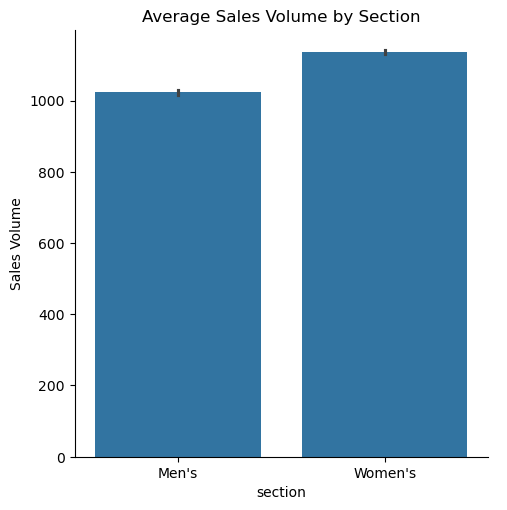

In [81]:
sns.catplot(x='section',y='Sales Volume',data=df, kind='bar')
plt.title('Average Sales Volume by Section')

plt.show()

**mulitvariate**

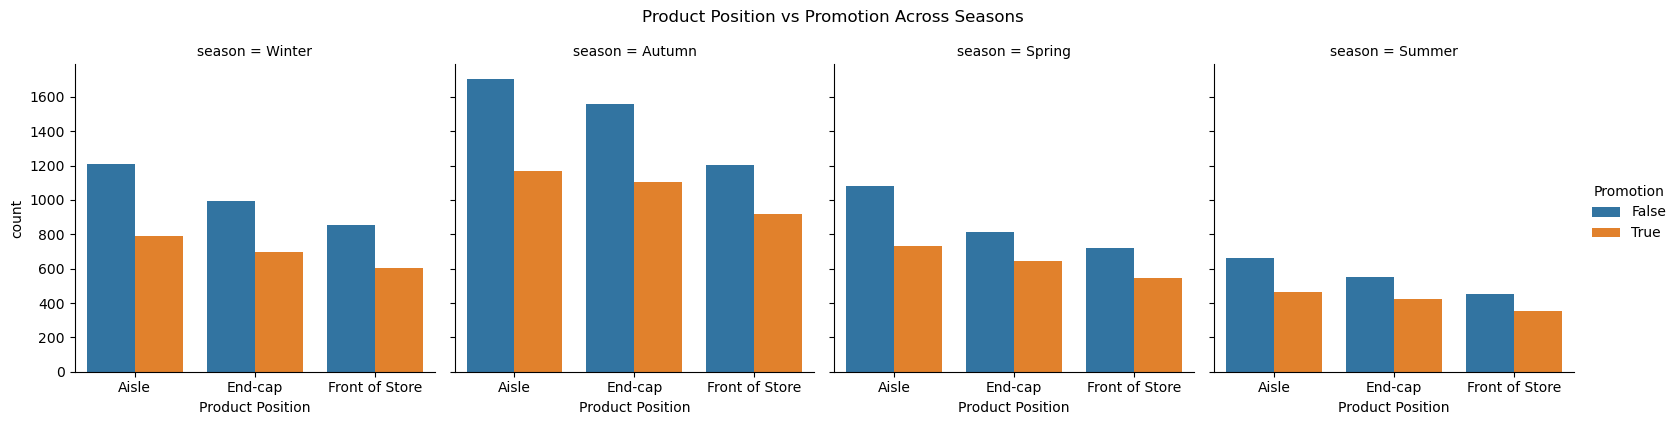

In [82]:
sns.catplot(
    data=df,
    x="Product Position",
    hue="Promotion",
    col="season",
    kind="count",
    height=4,
    aspect=1)
plt.suptitle("Product Position vs Promotion Across Seasons", y=1.05)
plt.show()

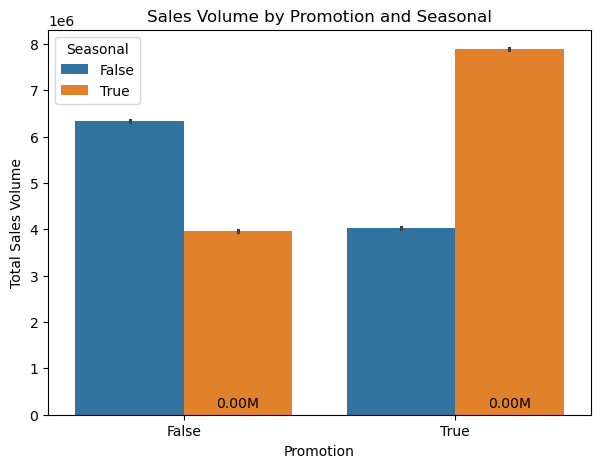

In [83]:
plt.figure(figsize=(7,5))
ax=sns.barplot(
    x='Promotion',
    y='Sales Volume',
    hue='Seasonal',
    data=df,
    estimator=sum)
ax.bar_label(
        container,
        labels=[f'{v/1_000_000:.2f}M' for v in container.datavalues],
        padding=3)
plt.title('Sales Volume by Promotion and Seasonal')
plt.ylabel('Total Sales Volume')
plt.xlabel('Promotion')
plt.legend(title='Seasonal')
plt.show()


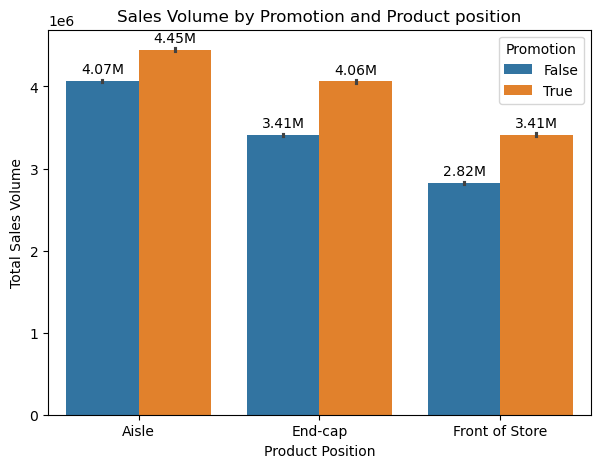

In [84]:
plt.figure(figsize=(7,5))
ax=sns.barplot(
    x='Product Position',
    y='Sales Volume',
    hue='Promotion',
    data=df,
    estimator=sum
)

plt.title('Sales Volume by Promotion and Product position')
plt.ylabel('Total Sales Volume')
plt.xlabel('Product Position')
plt.legend(title='Promotion')
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{v/1_000_000:.2f}M' for v in container.datavalues],
        padding=3)
plt.show()


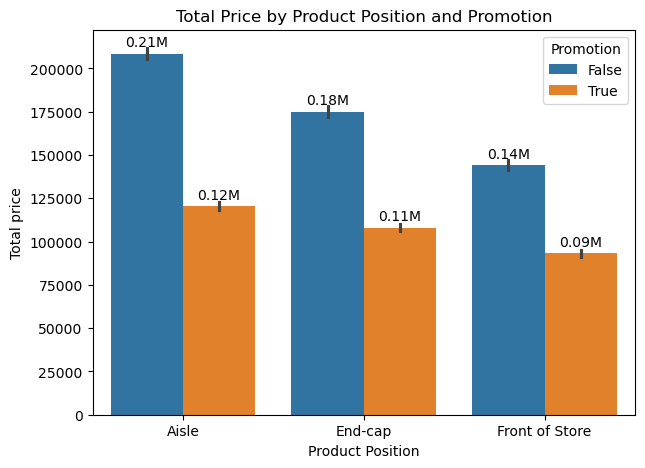

In [85]:
plt.figure(figsize=(7,5))
ax=sns.barplot(
    x='Product Position',
    y='price',
    hue='Promotion',
    data=df,
    estimator=sum
)

plt.title('Total Price by Product Position and Promotion')
plt.ylabel('Total price')
plt.xlabel('Product Position')
plt.legend(title='Promotion')
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{v/1_000_000:.2f}M' for v in container.datavalues],
        padding=3)
plt.show()

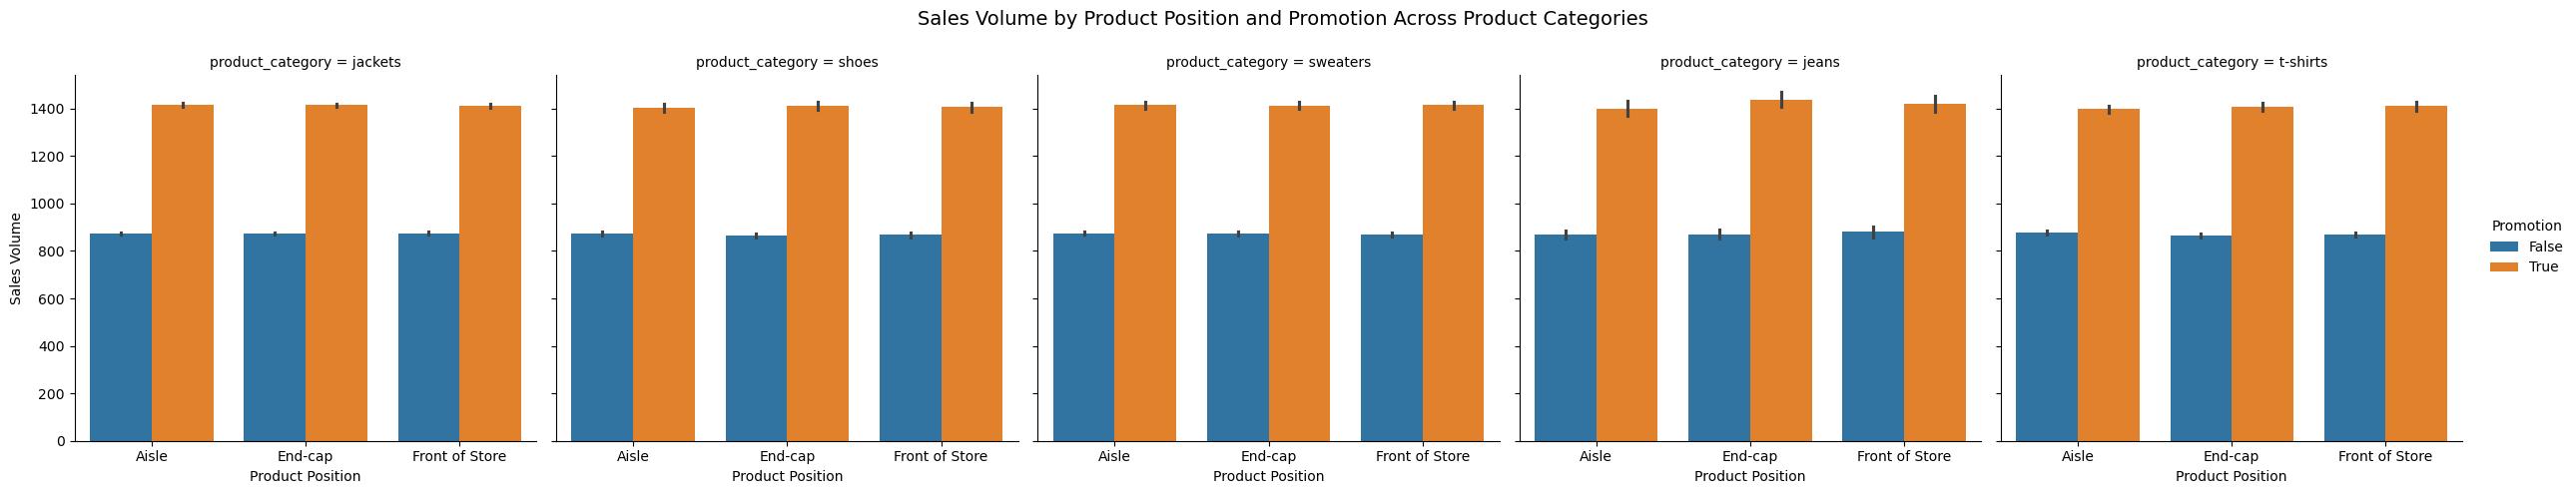

In [86]:
g=sns.catplot(
    data=df,
    x="Product Position",
    y='Sales Volume',
    hue="Promotion",
    col="product_category",
    kind="bar"
)
plt.suptitle(
    "Sales Volume by Product Position and Promotion Across Product Categories",
    fontsize=14
)
g.fig.subplots_adjust(top=0.85)
plt.show()

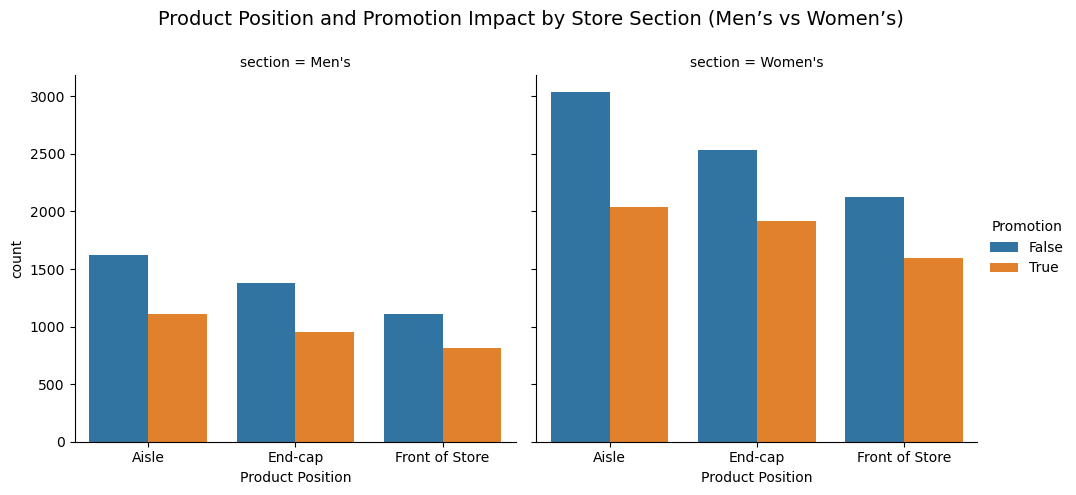

In [87]:
g=sns.catplot(
    data=df,
    x="Product Position",
    hue="Promotion",
    col="section",
    kind="count"
)
plt.suptitle(
    "Product Position and Promotion Impact by Store Section (Men’s vs Women’s)",
    fontsize=14
)
g.fig.subplots_adjust(top=0.85)
plt.show()

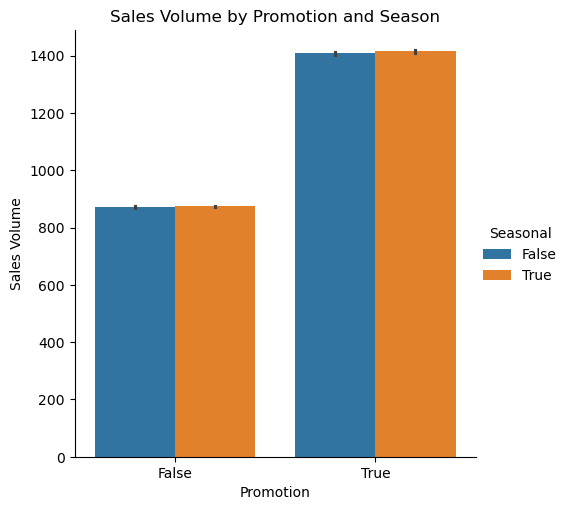

In [88]:
sns.catplot(
    data=df,
    x="Promotion",
    y="Sales Volume",
    hue="Seasonal",
    kind="bar")
plt.title("Sales Volume by Promotion and Season")
plt.show()


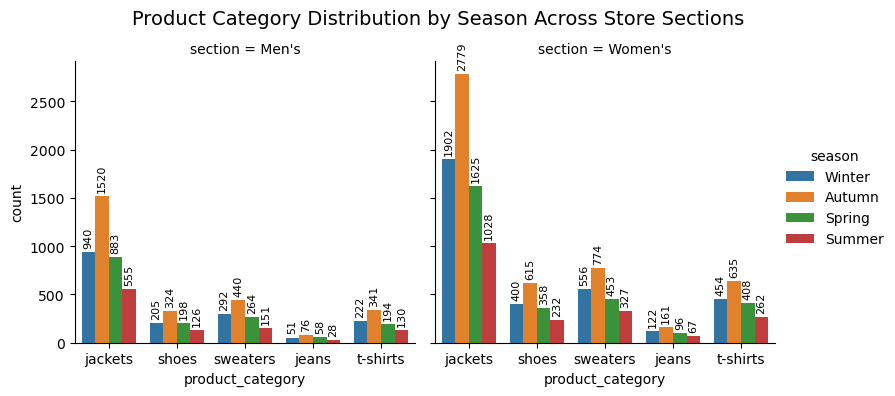

In [89]:
g = sns.catplot(
    data=df,
    x="product_category",
    hue="season",
    col="section",
    kind="count",
    height=4,
    aspect=1)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle(
    "Product Category Distribution by Season Across Store Sections",
    fontsize=14)
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(
            container,
            padding=3,
            fontsize=8,
            rotation=90)
plt.show()

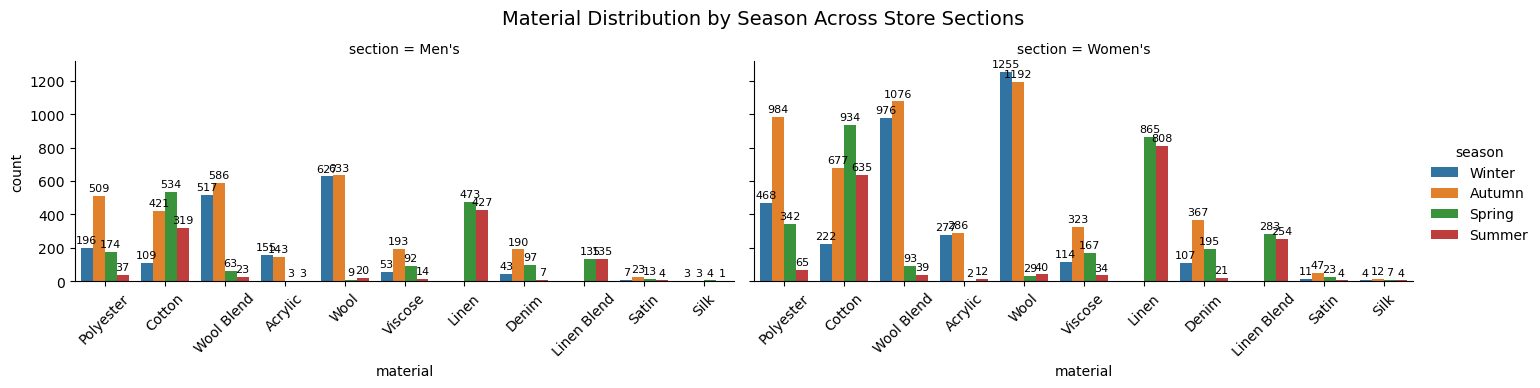

In [90]:
g = sns.catplot(
    data=df,
    x="material",
    hue="season",
    col="section",
    kind="count",
    height=4,
    aspect=1.8)
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)

    for container in ax.containers:
        ax.bar_label(
            container,
            padding=2,
            fontsize=8)

g.fig.subplots_adjust(bottom=0.30, top=0.85)
g.fig.suptitle(
    "Material Distribution by Season Across Store Sections",
    fontsize=14)
plt.show()


In [91]:
df

,Product Position,Promotion,Seasonal,Sales Volume,product_name,price,product_category,section,season,material,origin
0,Aisle,True,True,1243,BASIC PUFFER JACKET,78.99,jackets,Men's,Winter,Polyester,Brazil
1,Aisle,True,False,1429,TUXEDO JACKET,14.99,jackets,Men's,Autumn,Cotton,Turkey
2,End-cap,True,True,1168,SLIM FIT SUIT JACKET,71.95,jackets,Women's,Autumn,Polyester,Morocco
3,Aisle,True,False,1348,STRETCH SUIT JACKET,30.99,jackets,Men's,Spring,Polyester,China
4,End-cap,True,True,1602,DOUBLE FACED JACKET,22.99,jackets,Women's,Winter,Wool Blend,China
...,...,...,...,...,...,...,...,...,...,...,...
20247,Front of Store,True,False,1754,CROPPED WASHED T-SHIRT CHARCOAL,31.95,jeans,Women's,Summer,Linen Blend,India
20248,Aisle,False,False,872,SATIN WOVEN LEATHER SLIDES STONE,49.99,jackets,Women's,Spring,Linen,China
20249,Aisle,True,False,1360,RELAXED CROPPED LEATHER JACKET CHARCOAL,20.99,shoes,Women's,Spring,Polyester,China
20250,Aisle,False,False,892,SLIM BASIC 100% WOOL SWEATER BURGUNDY,64.95,jackets,Women's,Winter,Polyester,Spain
